In [1]:
using StaticArrays, DifferentialEquations, DynamicalSystems, CairoMakie

In [2]:
function sigma(x)
    λ = 10.0
    θ = -0.25
    return 1.0 / (1.0 + exp(-λ * (x  - θ)))
end
function HR(u, p, t)
        
    a, b, c, d, s, xr, r,  I, vs, chemical_link, electrical_link  = p
    x1, y1, z1, x2, y2, z2 = u
    
    du1 = y1 + b * x1 ^ 2 - a * x1 ^3 - z1 + I - chemical_link * ( x1 - vs ) * sigma(x2) + electrical_link * ( x2 - x1 )
    du2 = c - d * x1 ^2 - y1
    du3 = r * ( s * ( x1 - xr ) - z1 )
    
    du4 = y2 + b * x2 ^ 2 - a * x2 ^3 - z2 + I - chemical_link * ( x2 - vs ) * sigma(x1) + electrical_link * ( x1 - x2 )
    du5 = c - d * x2 ^2 - y2
    du6 = r * ( s * ( x2 - xr ) - z2 )
    return SVector(du1, du2, du3,
                    du4, du5, du6)
end

HR (generic function with 1 method)

Электрическая сила связи 0.01, химическая  0.017

Откуда здесь удвоенный аттрактор? [-1.011500544136496, -4.462129513800015, 3.6045012165519332, -0.9799175816292076, -4.191711488071786, 3.5853599126087565]

In [427]:
a = 1.; b = 3.; c = 1.; d = 5.;
xr = -1.6; r = 0.01; s = 5.; I = 4.; xv = 2.;

chemical_link = 0.01
electrical_link = 0.01;

In [428]:
time = 10000
timestep = 0.01
timerange = range(1, time, step = timestep)

1.0:0.01:10000.0

In [434]:
u0 = tr[end]
p = SA[a, b, c, d, s, xr, r, I, xv, chemical_link, electrical_link];
ds = ContinuousDynamicalSystem(HR,  u0, p)

6-dimensional continuous dynamical system
 state:       [-1.22295, -6.35756, 3.96711, -1.20323, -6.10152, 3.99382]
 rule f:      HR
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [1.0, 3.0, 1.0, 5.0, 5.0, -1.6, 0.01, 4.0, 2.0, 0.01, 0.01]

In [435]:
tr = trajectory(ds, 10000, Ttr  = 150000, Δt = timestep; diffeq = (alg = Vern9(), adaptive = false, dt = timestep));
xsum = tr[:, 1] + tr[:, 4];

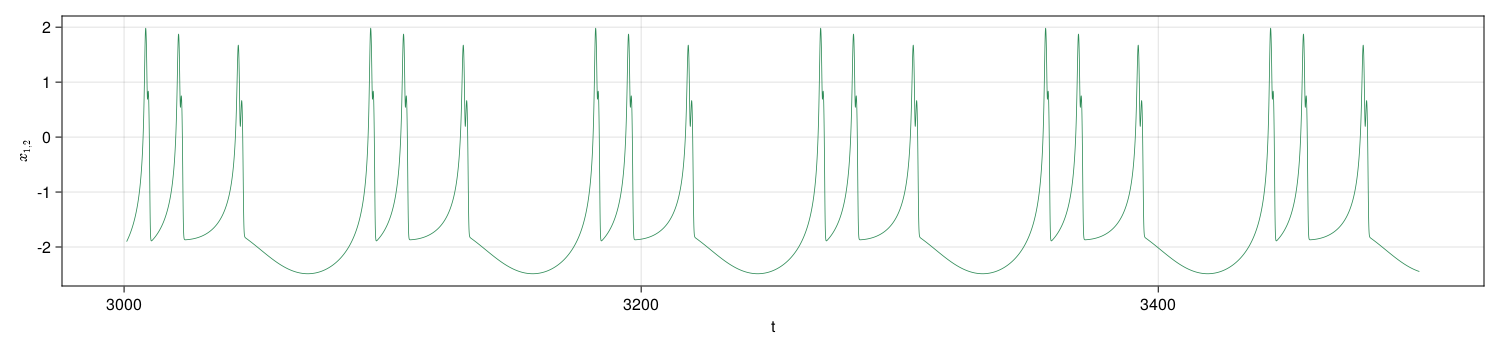

In [436]:
ts = 300000; tf = 350000
f = Figure(resolution = (1500, 350))
ax1 = Axis(f[1, 1], xlabel = "t", ylabel = L"x_{1,2}")
lines!(ax1, timerange[ts:tf], xsum[ts:tf], linewidth = 0.8, color = :seagreen)
f

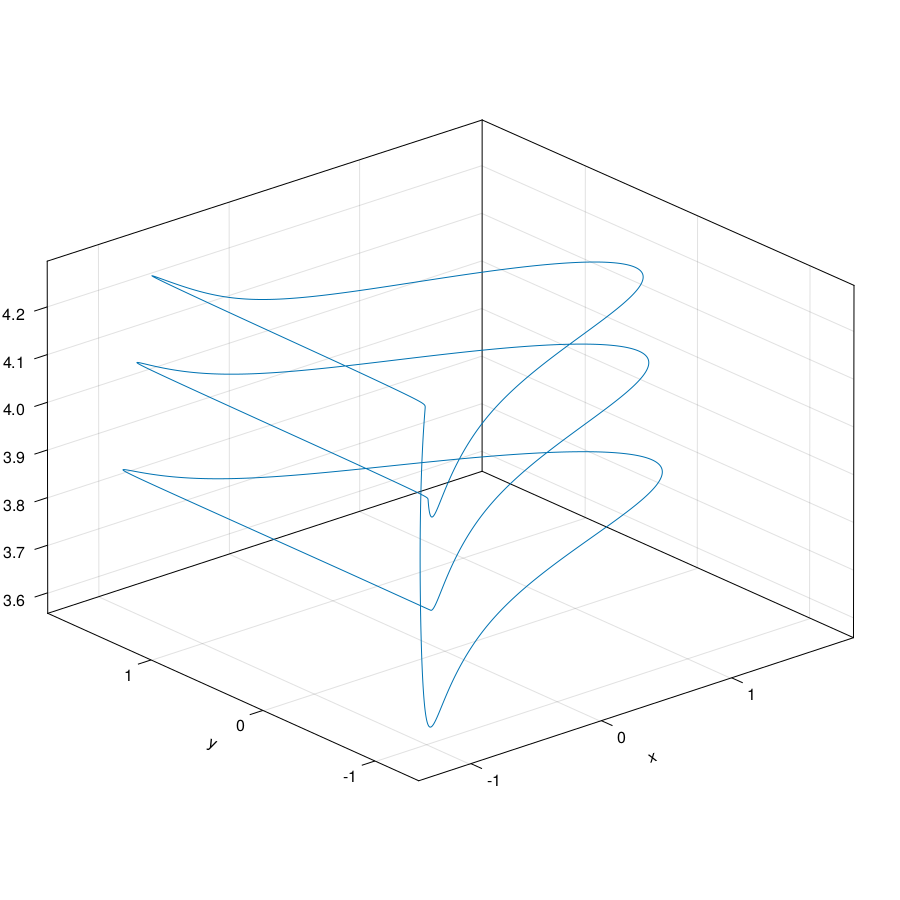

In [437]:
ts = 300000; tf = 350000
f = Figure(resolution = (900, 900))
ax = Axis3(f[1, 1])
lines!(ax, tr[ts:tf, 1], tr[ts:tf, 4],tr[ts:tf, 3], linewidth = 1.0 )
f

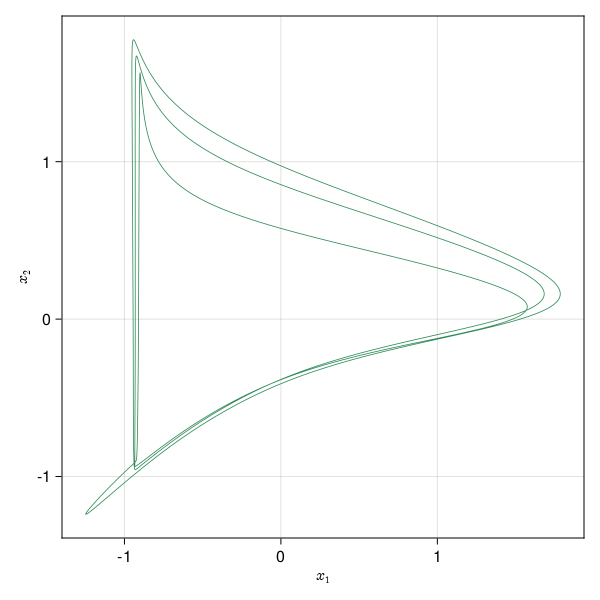

In [438]:
ts = 300000; tf = 350000
f = Figure(resolution = (600, 600))
ax1 = Axis(f[1, 1], xlabel = L"x_1", ylabel = L"x_{2}")
lines!(ax1, tr[ts:tf, 1], tr[ts:tf, 4], linewidth = 0.8, color = :seagreen)
f